PROJECT

In [15]:
#TASK 1
import pandas as pd

# Load the Excel file
file_path = "FEV-data-Excel.xlsx"  #Path of file
excel_data = pd.ExcelFile(file_path)
# Load the sheet with EV data
df = excel_data.parse('Auta elektryczne') #name of the sheet
# Step a: Filter EVs with price <= 350,000 PLN and range >= 400 km
filtered_df = df[
    (df['Minimal price (gross) [PLN]'] <= 350000) &
    (df['Range (WLTP) [km]'] >= 400)
]

# Step b: Group by manufacturer (Make)
grouped_by_make = filtered_df.groupby('Make')

# Step c: Calculate average battery capacity for each manufacturer
average_battery_by_make = grouped_by_make['Battery capacity [kWh]'].mean().reset_index()
average_battery_by_make.columns = ['Make', 'Average Battery Capacity [kWh]']

# Display filtered EVs that meet the criteria
print("Filtered EVs with price ≤ 350,000 PLN and range ≥ 400 km:")
print(filtered_df[['Car full name', 'Make', 'Battery capacity [kWh]', 'Range (WLTP) [km]', 'Minimal price (gross) [PLN]']])

# Display EVs grouped by manufacturer
print("\nEVs grouped by manufacturer:")
for make, group in grouped_by_make:
    print(f"\n{make}:")
    print(group[['Car full name', 'Battery capacity [kWh]', 'Range (WLTP) [km]', 'Minimal price (gross) [PLN]']])


# Display average battery capacity per manufacturer
print("\nAverage battery capacity per manufacturer:")
print(average_battery_by_make)

Filtered EVs with price ≤ 350,000 PLN and range ≥ 400 km:
                        Car full name           Make  Battery capacity [kWh]  \
0              Audi e-tron 55 quattro           Audi                    95.0   
8                             BMW iX3            BMW                    80.0   
15        Hyundai Kona electric 64kWh        Hyundai                    64.0   
18                   Kia e-Niro 64kWh            Kia                    64.0   
20                   Kia e-Soul 64kWh            Kia                    64.0   
22                  Mercedes-Benz EQC  Mercedes-Benz                    80.0   
39  Tesla Model 3 Standard Range Plus          Tesla                    54.0   
40           Tesla Model 3 Long Range          Tesla                    75.0   
41          Tesla Model 3 Performance          Tesla                    75.0   
47    Volkswagen ID.3 Pro Performance     Volkswagen                    58.0   
48              Volkswagen ID.3 Pro S     Volkswagen          

TASK 1 ANALYSIS:
a- The very first thing i did that is to filtered the car data for the customer having budget 350000 and wants a Ev which has
minimum range of 400km. so , There are total 12 EVs satistfying the condition.
b- After grouping the EVs with respect to the manufacturer(make) we got to know how many cars satistfying the condition
belong to each manufacturer. according to analysis Tesla and Volkswagen have higher no. of EVs compare to others.
c-According to the analysis we came to know that 'Audi' has the highest average battery capacity compares to other.

Recommendtion:
1)Audi cars below the price 350000 have highest average battery capacity so, the customers are tend to look for the audi cars .
all the others manufacturer should focus on imporving the average battery capacity.
2) All the manufacturer other than Tesla and Volkswagen should focus on making cars in affordable and good range which can help to 
increase there sales.


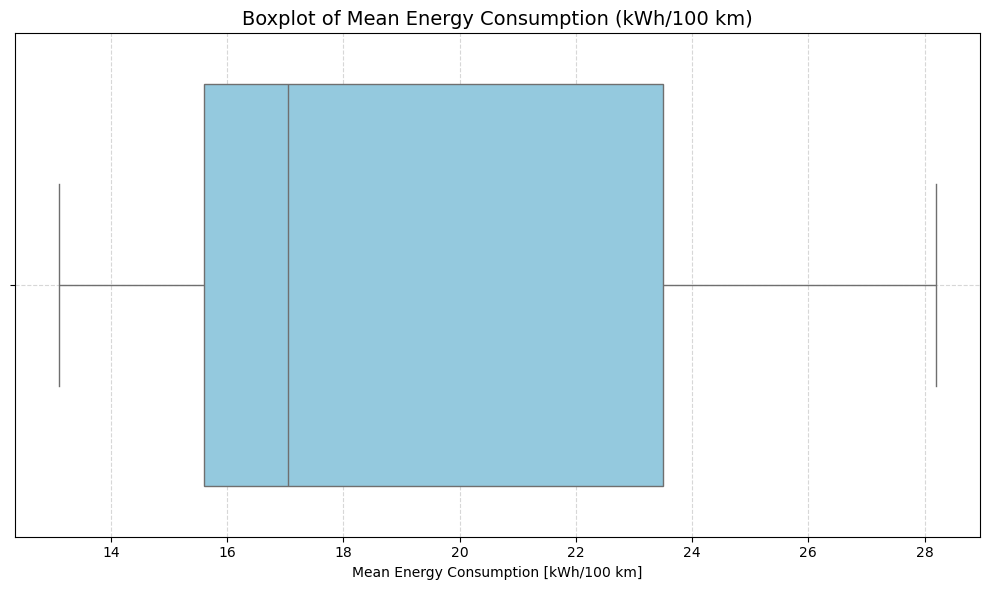

In [17]:
#TASK 2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Excel file and sheet
df = pd.read_excel("FEV-data-Excel.xlsx", sheet_name='Auta elektryczne')

# Set up the plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['mean - Energy consumption [kWh/100 km]'], color='skyblue')

# Add title and labels
plt.title('Boxplot of Mean Energy Consumption (kWh/100 km)', fontsize=14)
plt.xlabel('Mean Energy Consumption [kWh/100 km]')

# Show the plot
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


TASK 2 ANALYSIS:
To find the  Find the outliers in the mean- Energy consumption [kWh/100 km] column ,I have used a boxplot
and according to my analysis , There is no outliers present in the column as you see in the boxplot.

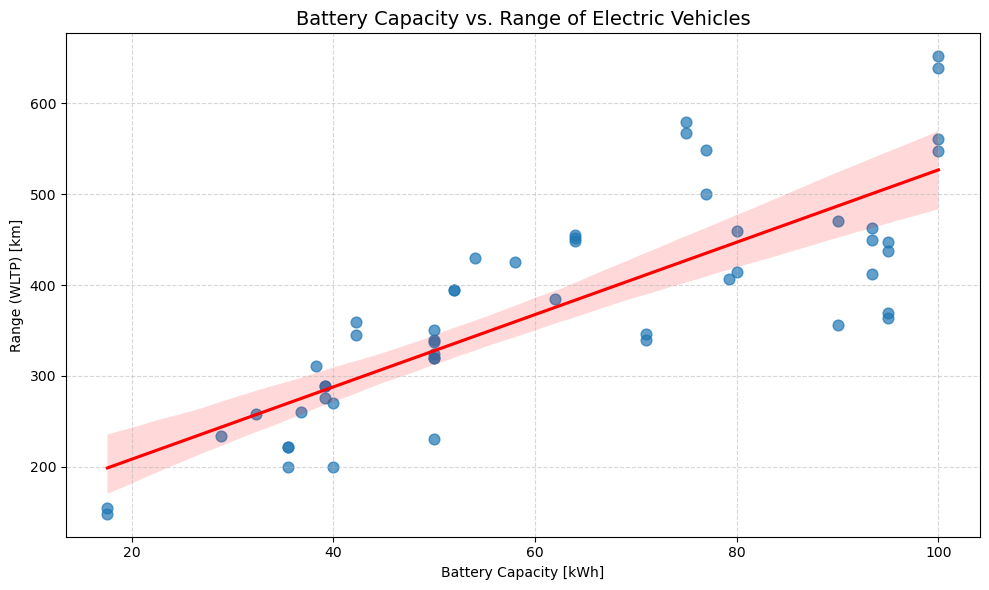

In [23]:
#TASK 3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file and the sheet
df = pd.read_excel("FEV-data-Excel.xlsx", sheet_name="Auta elektryczne")

# plot
plt.figure(figsize=(10, 6))
sns.regplot(
    data=df,
    x="Battery capacity [kWh]",
    y="Range (WLTP) [km]",
    scatter_kws={'s': 60, 'alpha': 0.7},
    line_kws={'color': 'red'}
)

# Add titles and labels
plt.title("Battery Capacity vs. Range of Electric Vehicles", fontsize=14)
plt.xlabel("Battery Capacity [kWh]")
plt.ylabel("Range (WLTP) [km]")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


TASK 3 ANALYSIS:
According to the analysis there is a "Positive Corelation" as in the plot displayed 'Upward trend' 
means, cars with larger battery capacity generally have longer range.
This is what customer expect: more energy = more distance.
There are some differences in the relationship like Some EVs with similar battery size have different ranges. It can be due to vehicle weight,etc.
There can also be some outliers.


Conclusion:
The relationship may slightly distrub  at higher battery sizes.
Doubling battery size does not always double range.
The outliers can be :-
A car with high capacity but short range may be inefficient.
A car with lower capacity but high range may be highly efficient.

In [7]:
#TASK 4
import pandas as pd

class EVRecommender:
    def __init__(self, data_path, sheet_name):
        self.df = pd.read_excel("FEV-data-Excel.xlsx" , sheet_name="Auta elektryczne")
    
    def recommend(self, budget, min_range, min_battery):
        # Filter EVs based on user criteria
        filtered_df = self.df[
            (self.df['Minimal price (gross) [PLN]'] <= budget) &
            (self.df['Range (WLTP) [km]'] >= min_range) &
            (self.df['Battery capacity [kWh]'] >= min_battery)
        ]
        
        # Sort by range and then by battery capacity (descending order)
        recommended_evs = filtered_df.sort_values(
            by=['Range (WLTP) [km]', 'Battery capacity [kWh]'], ascending=[False, False]
        )
        
        # Return the top 3 matches
        return recommended_evs[['Car full name', 'Minimal price (gross) [PLN]', 'Range (WLTP) [km]', 'Battery capacity [kWh]']].head(3)
# Initialize the recommender with the correct file path
recommender = EVRecommender("FEV-data-Excel.xlsx", "Auta elektryczne")

# Take user input 
budget = int(input("Enter your budget (PLN): "))
min_range = int(input("Enter the minimum range (km): "))
min_battery = float(input("Enter the minimum battery capacity (kWh): "))

# recommendations
top_evs = recommender.recommend(budget, min_range, min_battery)
print("\nTop recommended EVs:\n", top_evs)

Enter your budget (PLN):  300000
Enter the minimum range (km):  300
Enter the minimum battery capacity (kWh):  50



Top recommended EVs:
                 Car full name  Minimal price (gross) [PLN]  Range (WLTP) [km]  \
40   Tesla Model 3 Long Range                       235490                580   
41  Tesla Model 3 Performance                       260490                567   
48      Volkswagen ID.3 Pro S                       179990                549   

    Battery capacity [kWh]  
40                    75.0  
41                    75.0  
48                    77.0  


TASK 4 ANALYSIS:
According to the analysis , By creating a class for the given condition can be proof useful as
1) The customers can  find the best EVs according to there budget and requirement. 
2)It also helps the manufacturers(make) to identify the customers prefrences and according to that making the decisions to improve the sales.
3)customers can able to get top three EVs based on there requirements.

In [19]:
#TASK 5
import pandas as pd
from scipy.stats import ttest_ind

# Load the Excel file
file_path = "FEV-data-Excel.xlsx"
xls = pd.ExcelFile(file_path)

# Load the data from the sheet
df = pd.read_excel(xls, sheet_name="Auta elektryczne")

# Filter data for Tesla and Audi
tesla_power = df[df["Make"] == "Tesla"]["Engine power [KM]"].dropna()
audi_power = df[df["Make"] == "Audi"]["Engine power [KM]"].dropna()

# Perform two-sample t-test
t_stat, p_value = ttest_ind(tesla_power, audi_power, equal_var=False)  # Welch's t-test

# Print results
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Conclusion
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis :There is a significant difference in engine power between Tesla and Audi.")
else:
    print("Reject the alternative hypothesis :There is no significant difference in engine power between Tesla and Audi.")


T-statistic: 1.7940
P-value: 0.1068
There is no significant difference in engine power between Tesla and Audi.


Insights:
Here ,
Null hypothesis(H0):There is no significant difference in engine power between Tesla and Audi.
Alternative hypothesis(H1):There is a significant difference in engine power between Tesla and Audi.

The p-value (0.107) is greater than the common significance level (0.05), meaning we fail to reject the null hypothesis.
This suggests that there is no statistically significant difference in the average engine power between Tesla and Audi vehicles.

Recommendtion:
1) As there is no such difference between the engine power of two brands(Tesla & Audi) ,The brand must focus on imporving or making 
significantly changes in there other features like Battery capacity[kWh],Range(WLTP)[km],Maximum DC charging power [kW] ,etc. for imporving there sales
by selling some what different features than others.
2)To improve the sales , the brand should focus on the customer preferances especially like Range, acceleration,max speed,engine power and battery 
capacity.

Conclusion:
By the analysis we can concluded thatTesla and Audi vehicles have near about same engine power, and buyers should consider other features when 
making purchasing decisions.


VIDEO LINK:

 https://drive.google.com/file/d/1nw7R_BWR4r2O-L4N9ZOItTye-y1wIHb0/view?usp=drivesdk